In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from google.colab import files
from google.colab import drive

In [ ]:
uploaded = files.upload()
train = pd.read_csv(io.BytesIO(uploaded['Dataset.csv']))
train.head()

Saving Dataset.csv to Dataset (6).csv


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
train.drop(columns=['CustomerId','Surname'] , axis=1,inplace=True)
train.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
categorical_subset = train[['Geography','Gender']]
categorical_subset = pd.get_dummies(categorical_subset)
categorical_subset.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,1,0
1,0,0,1,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,0,1,1,0


In [ ]:
train.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
train = pd.concat([train,categorical_subset],axis = 1)
train.drop(columns=['Geography','Gender'] , axis=1,inplace=True)
train.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:

features = train.drop(columns='Exited')
targets = pd.DataFrame(train['Exited'])

x_train , x_test , y_train , y_test = train_test_split(features,targets,test_size = 0.2 , random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 14)
(2000, 14)
(8000, 1)
(2000, 1)


In [ ]:
y_test[:2]

,Exited
6252,0
4684,0


In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from keras.layers import Dense , Dropout , Input , Average
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.utils import plot_model
from keras.models import Model
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
y_train = to_categorical(y_train)
y_train[:1]

array([[1., 0.]], dtype=float32)

In [ ]:
inlayer = Input(shape = x_train.shape[1] , name = "input")
hidden1 = Dense(10 , activation='relu', name = "layer1")(inlayer)
hidden2 = Dense(6,activation='relu' , name = "layer2")(hidden1)
droupoutlayer = Dropout(0.2)(hidden2)
outputlayer = Dense(2,activation='softmax' , name = "layer3")(droupoutlayer)
model = Model(inputs = inlayer , outputs = outputlayer , name = "model1")
model.summary()

Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 14)]              0         
_________________________________________________________________
layer1 (Dense)               (None, 10)                150       
_________________________________________________________________
layer2 (Dense)               (None, 6)                 66        
_________________________________________________________________
dropout_6 (Dropout)          (None, 6)                 0         
_________________________________________________________________
layer3 (Dense)               (None, 2)                 14        
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________


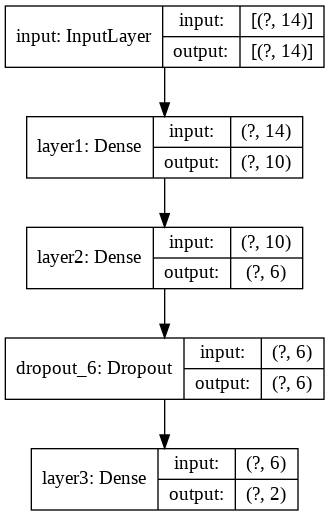

In [ ]:
plot_model(model , show_shapes=True)

In [ ]:
sgd = SGD(learning_rate=0.01 , momentum = 0.9)
model.compile(optimizer = sgd , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_loss' , mode= 'auto' , verbose=1 , patience=2)

In [ ]:
history = model.fit(x_train , y_train , batch_size=500 , epochs=100 , verbose=1,validation_split=0.2 , callbacks= [es])

Epoch 1/100
13/13 [==============================] - 0s 13ms/step - loss: 0.7691 - accuracy: 0.5566 - val_loss: 0.5439 - val_accuracy: 0.7544
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5629 - accuracy: 0.7733 - val_loss: 0.5026 - val_accuracy: 0.7987
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5259 - accuracy: 0.7933 - val_loss: 0.4876 - val_accuracy: 0.7987
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5041 - accuracy: 0.7942 - val_loss: 0.4833 - val_accuracy: 0.7987
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4967 - accuracy: 0.7939 - val_loss: 0.4793 - val_accuracy: 0.7987
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4955 - accuracy: 0.7942 - val_loss: 0.4750 - val_accuracy: 0.7987
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4898 - accuracy: 0.7941 - val_loss: 0.4716 - val_accuracy: 0.7987
Epoch 8/100


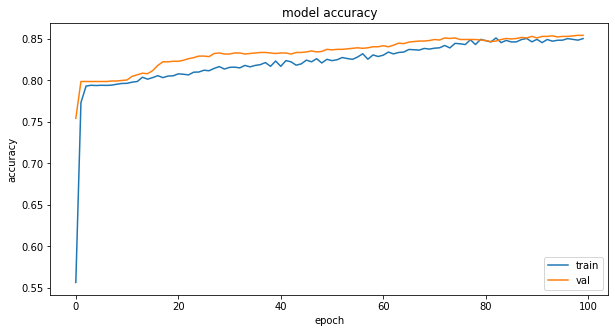

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='lower right')
plt.show()

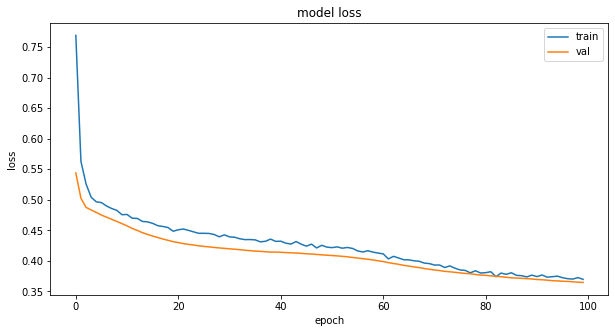

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper right')
plt.show()

In [ ]:
yp = model.predict(x_test)
print(yp)
predict = np.argmax(yp , axis=1)
print(predict)

[[0.9296693  0.07033069]
 [0.91513294 0.08486713]
 [0.8464645  0.15353546]
 ...
 [0.2531962  0.7468038 ]
 [0.92878175 0.07121826]
 [0.7715869  0.22841305]]
[0 0 0 ... 1 0 0]


In [ ]:
score = metrics.accuracy_score(y_test,predict)
round(score*100 , 2)

85.75

In [ ]:
model.save_weights('my_network_weights5.h5')
model.load_weights('my_network_weights5.h5')